# Part 1 数据准备阶段

### 1、导入库

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import datetime
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize'] = (10, 10)

先以USvideos.csv为例查看数据的情况

### 2、读取数据集

In [2]:
file_name = '../datasets/archive/US/USvideos.csv'
my_df = pd.read_csv(file_name, index_col='video_id')

### 3、数据总览

In [3]:
print(my_df.shape)
print(my_df.nunique())

(40949, 15)
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


### 4、预览缺失值及其数据类型

In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 15 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(7)
memory usage: 4.2+ MB


### 5、预览前五行

In [5]:
my_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### 6、数据清洗——修改日期数据格式

##### 通过观察发现，将原始数据集中的发布时间publish_time和推荐时间trending_time的时间这两列时间数据转化为标准格式
##### a)修正推荐日期trending_time的格式|

In [6]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_df['trending_date'].head()

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
Name: trending_date, dtype: datetime64[ns]

##### b)修正发布日期publish_time的格式，并新增发布星期publish_day、trending_day、pubulish_hour列

In [7]:
my_df["publishing_day"] = my_df["publish_time"].apply(
lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
my_df["trending_day"] = my_df["trending_date"].dt.weekday
my_df["publishing_hour"] = my_df["publish_time"].apply(lambda x: x[11:13])
my_df[['publishing_day','trending_day','publishing_hour']].head()

,publishing_day,trending_day,publishing_hour
video_id,,,
2kyS6SvSYSE,Mon,1,17
1ZAPwfrtAFY,Mon,1,07
5qpjK5DgCt4,Sun,1,19
puqaWrEC7tY,Mon,1,11
d380meD0W0M,Sun,1,18


### 7、数据清洗——修改数据类型

##### 将观看量、点赞数、不喜欢数、评论数等关键指标由FLOAT格式转化为INT格式；将Catogory_id由INT转化为字符串String格式

In [8]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    my_df[column] = my_df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    my_df[column] = my_df[column].astype(str)

### 8、数据清洗——导入相关数据成为新增列

##### 通过导入另一个文件US_category_id.json向数据中添加“视频类型”列
##### a)匹配id和category

In [9]:
id_to_category = {}

with open('../datasets/archive/US/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

##### b)插入category列

In [10]:
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df[['category_id', 'category']].head()

,category_id,category
video_id,,
2kyS6SvSYSE,22,People & Blogs
1ZAPwfrtAFY,24,Entertainment
5qpjK5DgCt4,23,Comedy
puqaWrEC7tY,24,Entertainment
d380meD0W0M,24,Entertainment


### 9、数据清洗——去除重复数据

##### 通过观察可以发现，原始数据集4万余条数据中，某一条推荐视频ID一般会在推荐榜单停留多天，因此我们针对video_id做去重处理，只留下每一条推荐视频最后一天的数据。

In [11]:
print(my_df.shape)
my_df = my_df[~my_df.index.duplicated(keep='last')]
print(my_df.shape)
my_df.index.duplicated().any()

(40949, 19)
(6351, 19)


False

# Part 2 数据分析阶段

### 1、基础指标——描述性统计

##### 作为全球最大最强的UGC互联网视频网站，用户参与度是Youtube关心的核心指标，而观看量、点赞、不喜欢和评论量是反应用户参与度的重要指标，因此对这几个核心指标进行描述性统计，可以看出：

##### a）推荐视频四项指标的数量级分别为：观看量>喜欢>评论>不喜欢

##### b) 推荐视频的指标均值为观看量200万，点赞量5.5万，评论量3.4千，不喜欢3.2千

##### c）推荐视频的四项指标均接近正态分布

In [12]:
my_df.describe()

,views,likes,dislikes,comment_count,trending_day
count,6.351000e+03,6.351000e+03,6.351000e+03,6.351000e+03,6351.00000
mean,1.962117e+06,5.557505e+04,3.067153e+03,6.450745e+03,2.81499
std,7.060057e+06,1.938307e+05,3.198849e+04,3.382370e+04,1.89652
min,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
25%,1.591565e+05,2.772500e+03,1.270000e+02,3.720000e+02,1.00000
50%,5.181070e+05,1.190600e+04,4.440000e+02,1.266000e+03,3.00000
75%,1.473582e+06,3.842850e+04,1.507000e+03,4.061500e+03,4.00000
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,6.00000


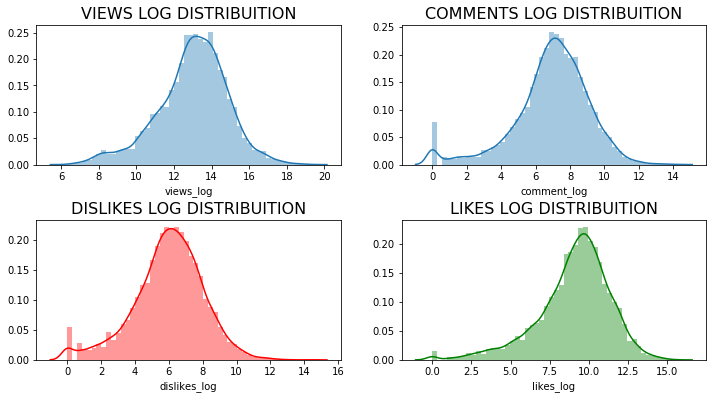

In [13]:
my_df['likes_log'] = np.log(my_df['likes'] + 1)
my_df['views_log'] = np.log(my_df['views'] + 1)
my_df['dislikes_log'] = np.log(my_df['dislikes'] + 1)
my_df['comment_log'] = np.log(my_df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(my_df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(my_df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(my_df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(my_df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### 2、二级指标——转化率指标分析

##### 为核心指标新增转化率指标，分析转化率指标的分布情况

##### a）推荐视频四项指标的转化率均值分别为 ：①观看-点赞 3%；②观看-评论 0.4%；③观看-不喜欢 0.16%

##### b) 不同“点赞”的相对分散的分布，“评论”和“不喜欢”的分布相似，非常集中，证明观众对于热门视频中喜爱程度因人而异，点赞趋向相对平均而分散，但对于想要发表评论和不喜欢的意见的视频相对集中。

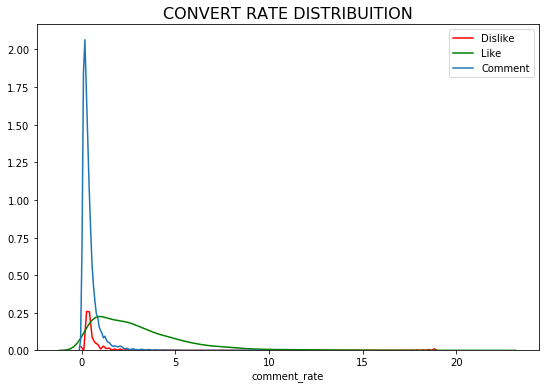

In [14]:
my_df['like_rate'] =  my_df ['likes'] / my_df['views'] * 100
my_df['dislike_rate'] =  my_df ['dislikes'] / my_df['views'] * 100
my_df['comment_rate'] =  my_df ['comment_count'] / my_df['views'] * 100

plt.figure(figsize = (9,6))

g1 = sns.distplot(my_df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(my_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(my_df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

### 3、按品类聚合核心指标

##### 按品类聚合后推荐视频观看量、点赞量和不喜欢量的分布情况

- a）热门视频数最高的三类视频是：娱乐类、音乐类、教学和风格类

- b) 游戏类、音乐类和喜剧类视频是在观看量和点赞量中表现最好的。值得注意的是，娱乐类虽然热门视频数量最多，但在观看量和点赞量上的表现并不是最突出的。

- c） 新闻政治类和非盈利类视频在观看、点赞和评论等各项指标中都显著低于其他类别。但不同的是，非盈利类的热门视频数量与关键指标一样很低，但新闻政治类的数量甚至在比较靠前的第5位。

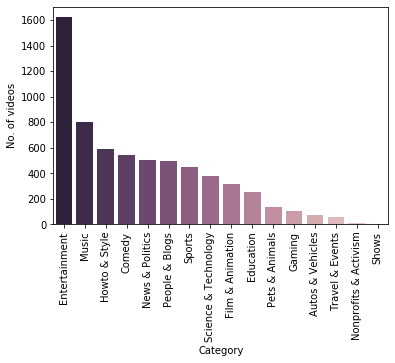

In [15]:
cdf = my_df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

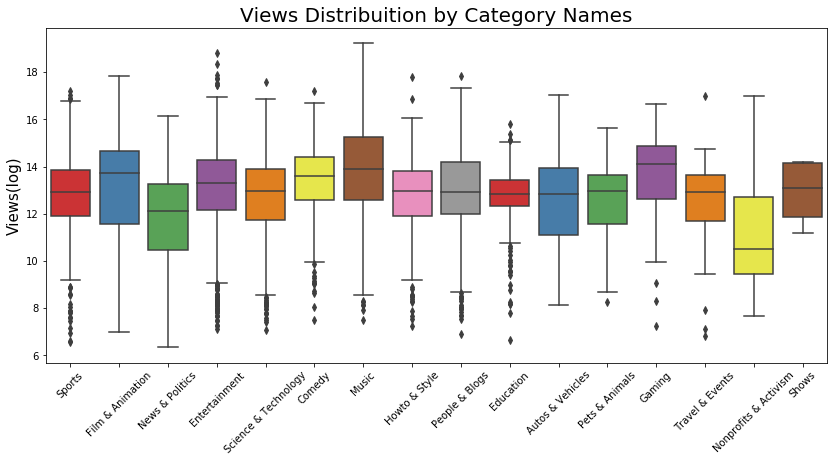

In [16]:
#按品类聚合后推荐视频的观看量、点赞量、不喜欢量、评论量分布情况？

plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='views_log', data=my_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.show()

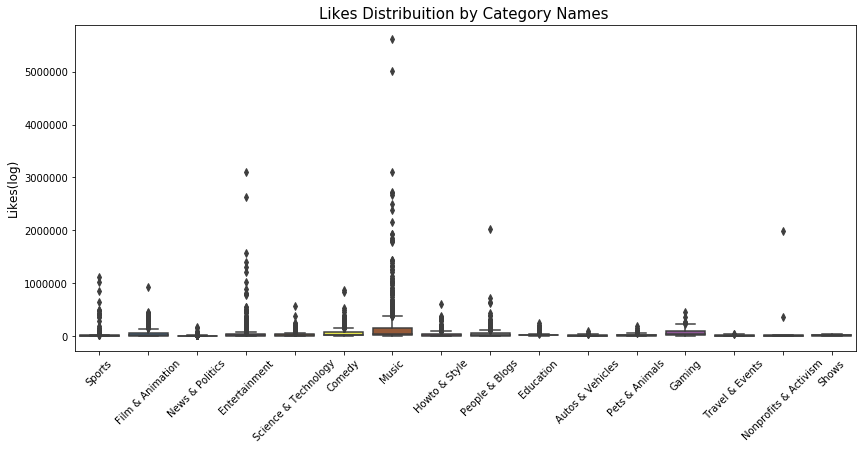

In [17]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='likes', data=my_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

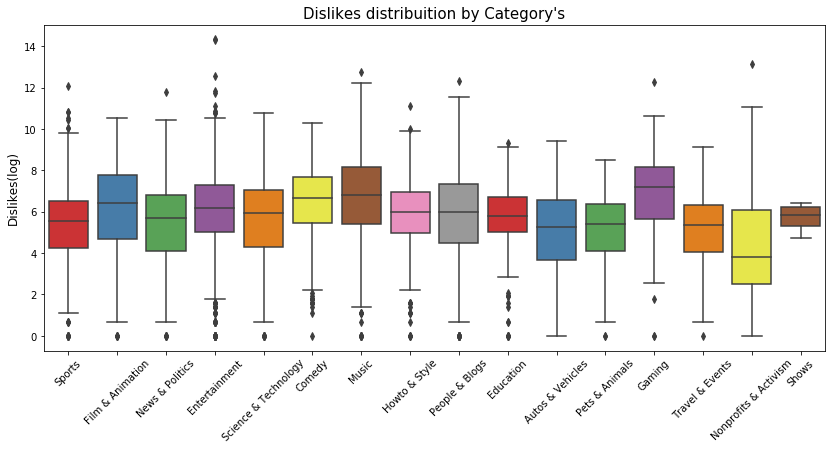

In [18]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='dislikes_log', data=my_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

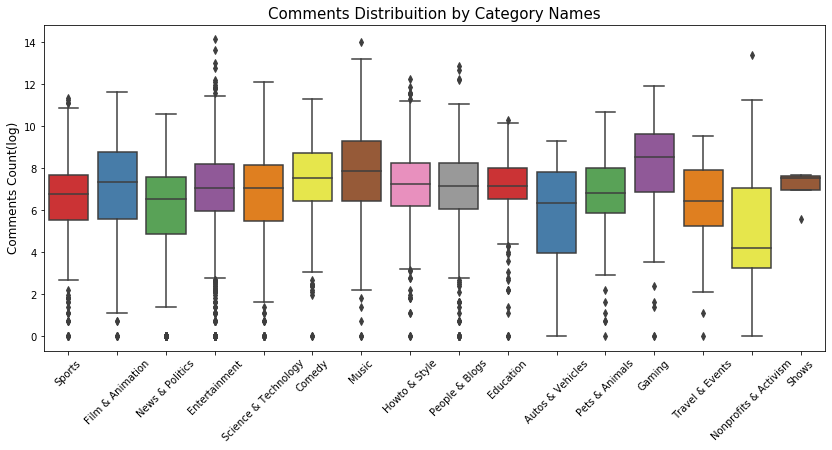

In [19]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='comment_log', data=my_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

### 4、按频道聚合核心指标

##### 按频道聚合后推荐视频观看量、点赞量和不喜欢量的分布情况

##### 热门视频数最高的TOP 10频道是：ESPN、艾伦秀、鸡毛秀、肥伦秀、奈飞、史蒂文库布特秀、NBA、CNN、Vox、詹姆斯戈登秀，可以看出产出热门视频数最多的频道是脱口秀栏目d频道，占据了半壁江山，其余被体育频道和新闻频道瓜分。

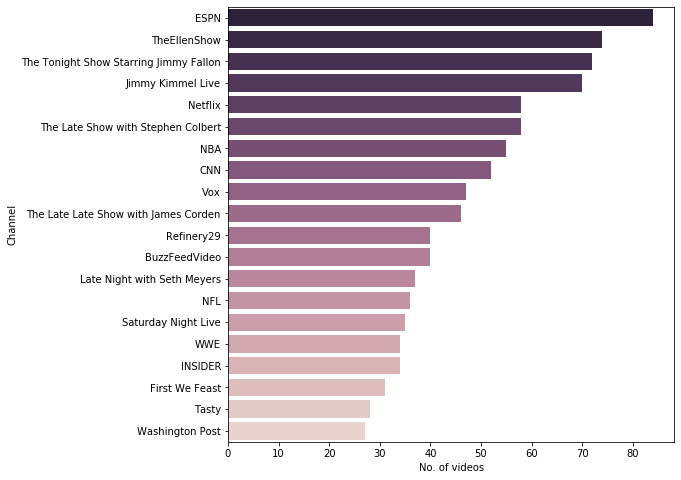

In [20]:
#按品类聚合后推荐视频的观看量、点赞量、不喜欢量、评论量分布情况？

cdf = my_df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

### 5、核心指标之间的相关性

##### 观看量、点赞量、不喜欢量和评论量之间存在着强相关，其中观看和点赞的相关性最强

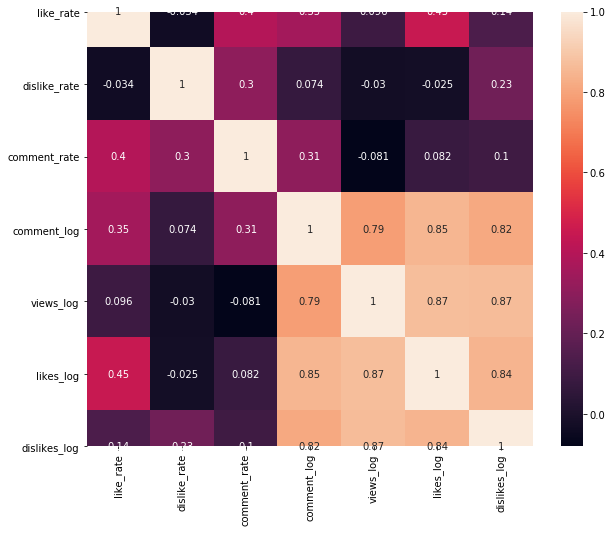

In [21]:
#核心数据指标之间的相关性

plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(my_df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category"]].corr(), annot=True)
plt.show()

### 6、时间指标分析——发布星期和发布时间
- a) 出人意料地，数据显示，周日和周六热门视频推荐数量明显少于一周其他日期发布的热门视频推荐数量。可能正因为如此，热门视频的创作者们也将热门视频的发布时间更多的选在周一至周五。

- b) 数据显示，从2PM到7PM之间的时段（在4PM和5PM之间达到峰值）的热门视频的发布数量最多。 上午12点至下午1点之间的时间段内发布的热门视频数量最少。可见创作者们更趋向于在下午和傍晚发布视频。

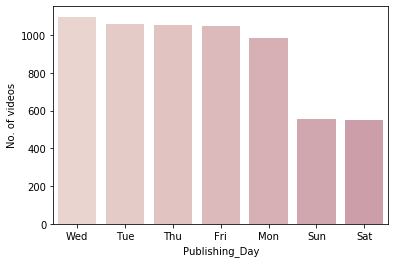

In [22]:
#发布星期分析

cdf = my_df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing_Day", ylabel="No. of videos")

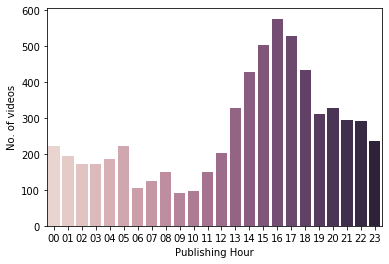

In [23]:
#发布精准时间分析

cdf = my_df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

### 7、文字指标分析——标题长度
- a) 标题长度分布类似于正态分布，其中大多数视频的标题长度大约在30到60个字符之间。

- b) 标题长度和观看量无显著相关关系，但观看次数超过1亿的视频的标题长度大约在33到55个字符之间。

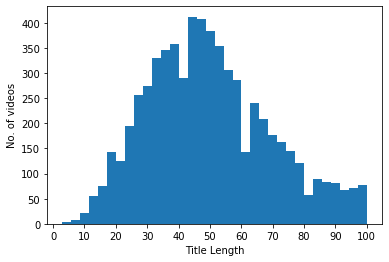

In [24]:
#标题文字长度分析

my_df["title_length"] = my_df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(my_df["title_length"], kde=False, rug=False,hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

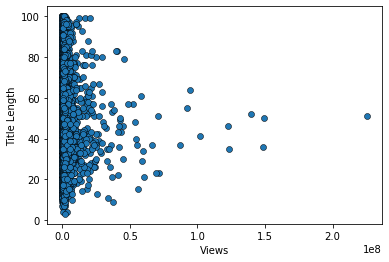

In [25]:
#标题长度与观看量的关系

fig, ax = plt.subplots()
_ = ax.scatter(x=my_df['views'], y=my_df['title_length'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

### 8、文字指标分析——标题词频
- a) 忽略“ the”和“ of”之类的无意义单词，我们可以看到“-”和“ |” 符号在热门视频标题中出现的次数很多，可知热门视频的作者比较注意标题的格式清晰。

- b) 词云中显眼的单词即为热门标题中最常出现的单词，一定程度上可以从中获取热门视频题材的灵感，视频标签和视频简介同理。

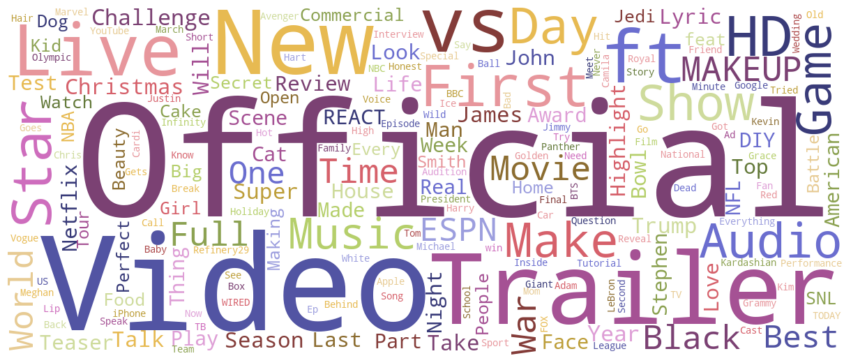

In [29]:
#标题中最常见的词的分析
from collections import Counter

title_words = list(my_df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
# 需要安装tqdm模块
Counter(title_words).most_common(25)

wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Part3 将处理好的数据保存

In [35]:
my_df

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,...,trending_day,publishing_hour,likes_log,views_log,dislikes_log,comment_log,like_rate,dislike_rate,comment_rate,title_length
video_id,,,,,,,,,,,,,,,,,,,,,
9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,...,1,02,6.486161,11.306860,3.258097,5.181784,0.804896,0.030721,0.217506,86
Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,...,1,18,8.924789,12.573915,6.675823,7.655391,2.601048,0.274122,0.730647,46
goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,...,1,21,5.733341,10.456970,3.295837,6.025866,0.885439,0.074745,1.187293,65
8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,...,1,19,9.687630,14.218456,5.468060,6.406880,1.077111,0.015773,0.040435,71
IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10T12:04:17.000Z,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,...,1,12,7.548029,12.377114,4.317488,5.564520,0.798965,0.031183,0.109563,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,3,13,10.549569,14.337638,7.234177,7.885329,2.263870,0.082166,0.157628,28
1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,...,3,01,11.002250,13.878297,5.948035,8.278174,5.635623,0.035875,0.369648,26
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,3,17,10.780393,13.879848,6.940222,8.292298,4.507286,0.096770,0.374326,84


In [50]:
# 删除一些列
columns = ['category_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed']
try:
    my_df = my_df.drop(labels=columns, axis=1)
except Exception as e:
    pass
my_df.to_csv('../datasets/archive/US/USvideos_out.csv')